In [283]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [284]:
data = pd.read_csv('C:/Users/whileduck/Dropbox/python/insurance.csv')
df = data.copy ()

In [285]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

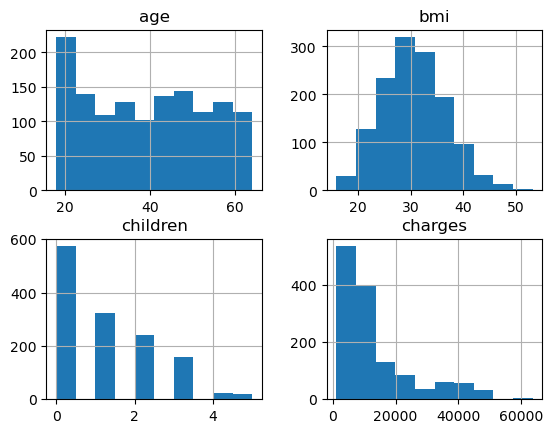

In [287]:
df.hist()

### 데이터를 변환 하기 전에 변환 할 변수들이 종속 변수(target값)에 영향을 미치는지 조사해보자 

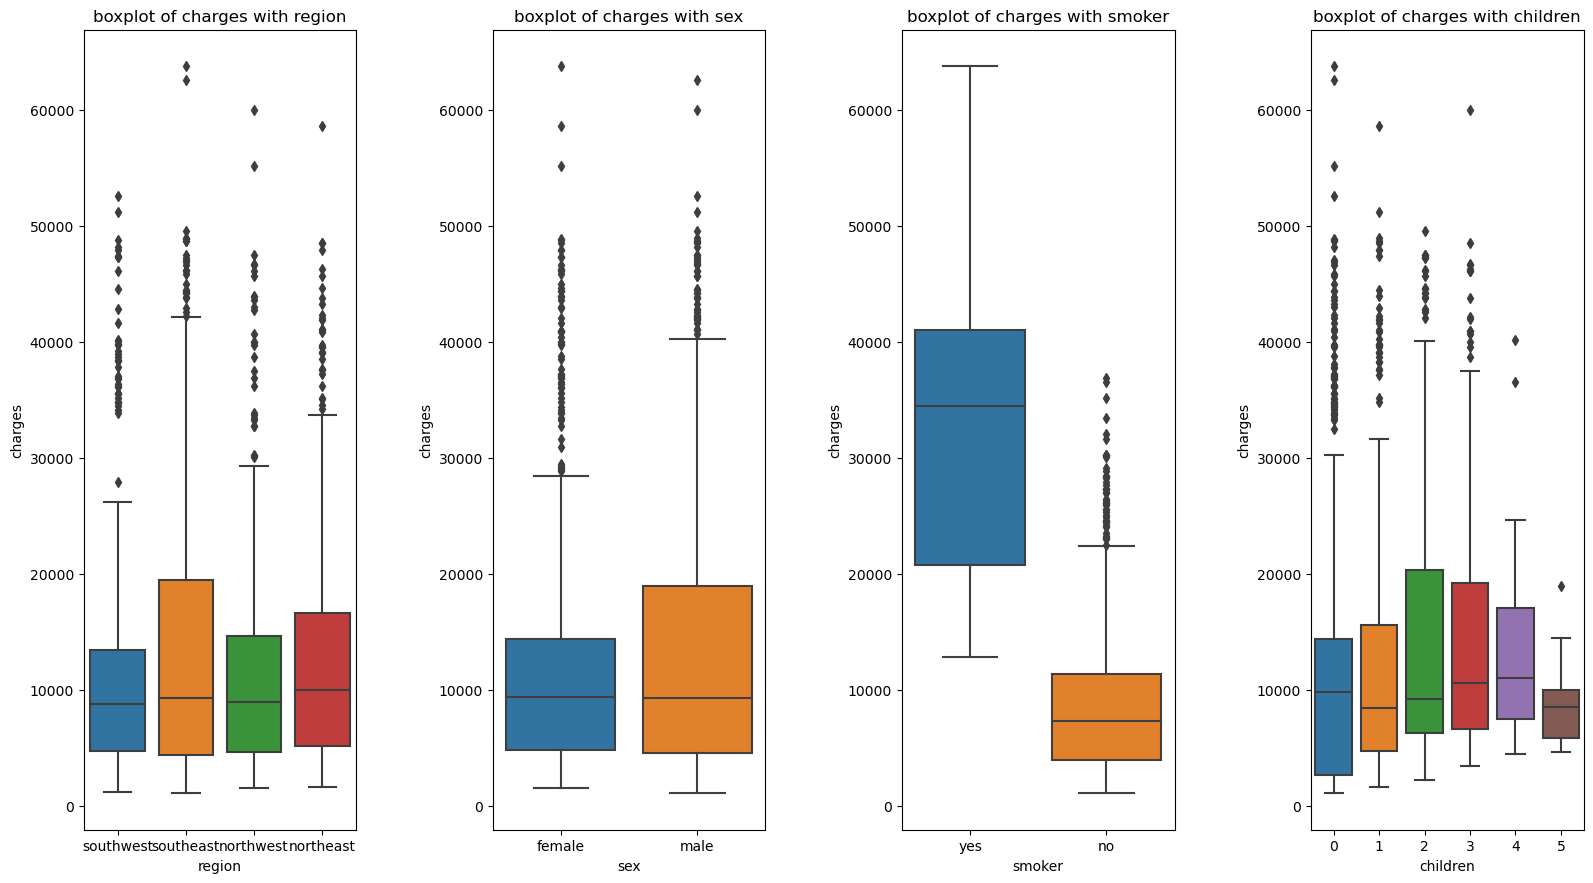

In [288]:
columns = ['region','sex','smoker','children']
plt.figure(figsize = [20,10])
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)
for i,var in enumerate(columns):
    plt.subplot(1,4,i+1)
    sns.boxplot(data = df,
                x = df[columns[i]],
                y = 'charges')
    plt.title(f'boxplot of charges with {var}')

# 흡연 여부에는 차이가 있는 거 같은데, 성별이나 지역엔 차이가 있나? 잘 모르겠다
# 아이 수에 따라서는 아이가 없을 때와, 1명부터 4명까지는 점점 상승, 5명일 때는 가장 적은 모습을 볼 수 있다.
* 성별, 지역에 따른 보험료 차이를 좀 더 유심히 봐보자 

Text(0.5, 1.0, 'kernal plot of charges with region')

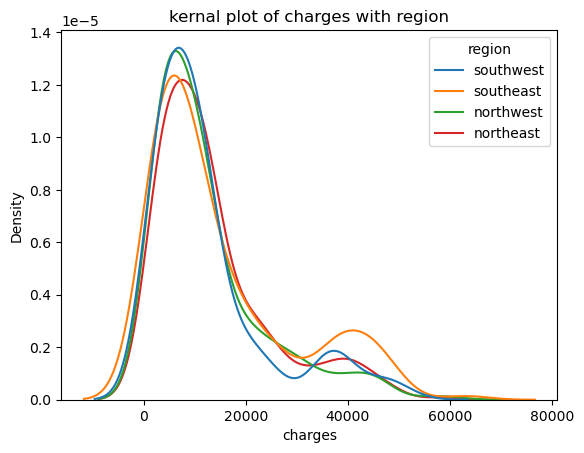

In [289]:
sns.kdeplot(data = df,
            x = 'charges',
            hue = 'region')
plt.title ('kernal plot of charges with region')

Text(0.5, 1.0, 'kernal plot of charges with sex')

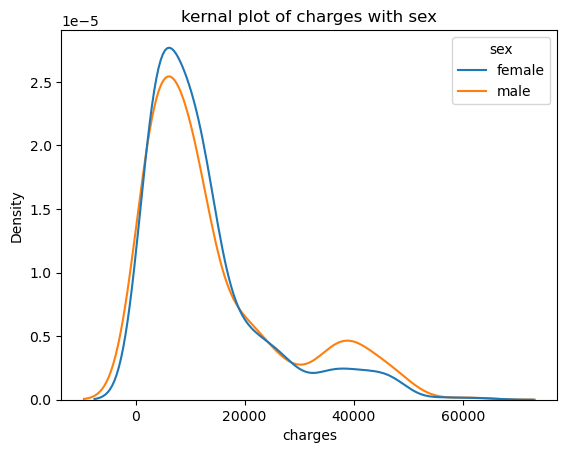

In [290]:
sns.kdeplot(data = df,
            x = 'charges',
            hue = 'sex')
plt.title ('kernal plot of charges with sex')

# 까짓거 그냥 바꿔주자 

## 범주형 변수들을 수치형 변수로 바꿔주는데 컴퓨터가 연속성이 있는 데이터가 아님을 보여주기 위해 각각의 변수를 하나의 컬럼으로 만들기 

* 예를 들어 남성이 1, 여성이 0 이라면 남성의 값인 1이 여성의 값인 0 보다 큰게 아님 
* 지역에 따라 1,2,3,4 로 나눴을 때 4에 해당하는 지역 값이 1에 해당하는 지역 값보다 큰게 아니라는 거를 알려주기 위해서 그래야됨 

In [291]:
region_list = list(set(df['region']))

southwest = []
northwest = []
southeast = []
northeast = []

region = [southwest,northwest,southeast,northeast]
print(region)
print(region_list)

[[], [], [], []]
['southwest', 'northwest', 'southeast', 'northeast']


### 반복문을 통해 원 핫 인코딩을 시행해줌 

In [292]:
for num,var in enumerate(region_list):
    for i in range(len(df)):
        if df['region'].iloc[i] == var:
            region[num].append(1)
        else:
            region[num].append(0)

In [293]:
sex_list = list(set(df['sex']))

sex_empty = [[],[]]

for num,var in enumerate(sex_list):
    for i in range(len(df)):
        if df['sex'].iloc[i] == var:
            sex_empty[num].append(0)
        else:
            sex_empty[num].append(1)

In [294]:
smoker_list = list(set(df['smoker']))

smoker_empty = [[],[]]

for num,var in enumerate(smoker_list):
    for i in range(len(df)):
        if df['smoker'].iloc[i] == var:
            smoker_empty[num].append(1)
        else:
            smoker_empty[num].append(0)

In [295]:
children_list = list(set(df['children']))

children_empty = [[],[],[],[],[],[]]

for num,var in enumerate(children_list):
    for i in range(len(df)):
        if df['children'].iloc[i] == var:
            children_empty[num].append(1)
        else:
            children_empty[num].append(0)

In [296]:
total_list = region_list + sex_list + smoker_list + children_list
total_content = region + sex_empty + smoker_empty + children_empty

for i,var in enumerate(total_list):
    df[f'{var}'] = total_content[i]

In [297]:
df  #원 핫 인코딩이 잘 된 모습을 볼 수 있다.

,age,sex,bmi,children,smoker,region,charges,southwest,northwest,southeast,...,female,male,yes,no,0,1,2,3,4,5
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,...,0,1,1,0,1,0,0,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1,...,1,0,0,1,0,1,0,0,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1,...,1,0,0,1,0,0,0,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,...,1,0,0,1,1,0,0,0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,...,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0,...,1,0,0,1,0,0,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,...,0,1,0,1,1,0,0,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,1,...,0,1,0,1,1,0,0,0,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,0,...,0,1,0,1,1,0,0,0,0,0


In [298]:
df = df.drop(columns = ['sex','children','smoker','region'])
df # 원 핫 인코딩 이후 필요없는 데이터는 제거 

,age,bmi,charges,southwest,northwest,southeast,northeast,female,male,yes,no,0,1,2,3,4,5
0,19,27.900,16884.92400,1,0,0,0,0,1,1,0,1,0,0,0,0,0
1,18,33.770,1725.55230,0,0,1,0,1,0,0,1,0,1,0,0,0,0
2,28,33.000,4449.46200,0,0,1,0,1,0,0,1,0,0,0,1,0,0
3,33,22.705,21984.47061,0,1,0,0,1,0,0,1,1,0,0,0,0,0
4,32,28.880,3866.85520,0,1,0,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,1,0,1,0,1,1,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,1,0,0,1,0,1,1,0,0,0,0,0
1336,21,25.800,2007.94500,1,0,0,0,0,1,0,1,1,0,0,0,0,0


# 독립 변수들의 수치가 각각 다르다 
* age 는 나이, bmi 는 수치, children 은 몇 명 .. age 25는 그렇게 큰 숫자가 아니지만, children 25는 정말 많은 숫자다.
* 각각의 수치를 정규화 시켜줄 필요가 있다. 

 * 평균과 표준 편차를 이용하는 표준화와 최소값, 최대값을 이용하는 정규화가 있는데 각 데이터들이 모두 정규 분포 형태가 아니니까 최소값과 최대값을 이용해서 하자 

In [299]:
def min_max_maker(x):
    
    min_x = min(x)
    max_x = max(x)
    
    scaled_x = (x - min_x) / (max_x - min_x)
    
    return scaled_x

In [300]:
# 정규화 시킬 목록들 

columns = ['age','bmi','charges']

for i in columns:
    df[i] = min_max_maker(df[i])

In [301]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,0.461022,0.305434,0.0,0.195652,0.456522,0.717391,1.0
bmi,1338.0,0.395572,0.164062,0.0,0.278080,0.388485,0.504002,1.0
charges,1338.0,0.193916,0.193301,0.0,0.057757,0.131849,0.247700,1.0
southwest,1338.0,0.242900,0.428995,0.0,0.000000,0.000000,0.000000,1.0
northwest,1338.0,0.242900,0.428995,0.0,0.000000,0.000000,0.000000,1.0
southeast,1338.0,0.272048,0.445181,0.0,0.000000,0.000000,1.000000,1.0
northeast,1338.0,0.242152,0.428546,0.0,0.000000,0.000000,0.000000,1.0
female,1338.0,0.505232,0.500160,0.0,0.000000,1.000000,1.000000,1.0
male,1338.0,0.494768,0.500160,0.0,0.000000,0.000000,1.000000,1.0
yes,1338.0,0.204783,0.403694,0.0,0.000000,0.000000,0.000000,1.0


# 독립 변수와 target 값과의 상관관계 확인 및 독립 변수 간 다중공산성 확인 

<AxesSubplot:>

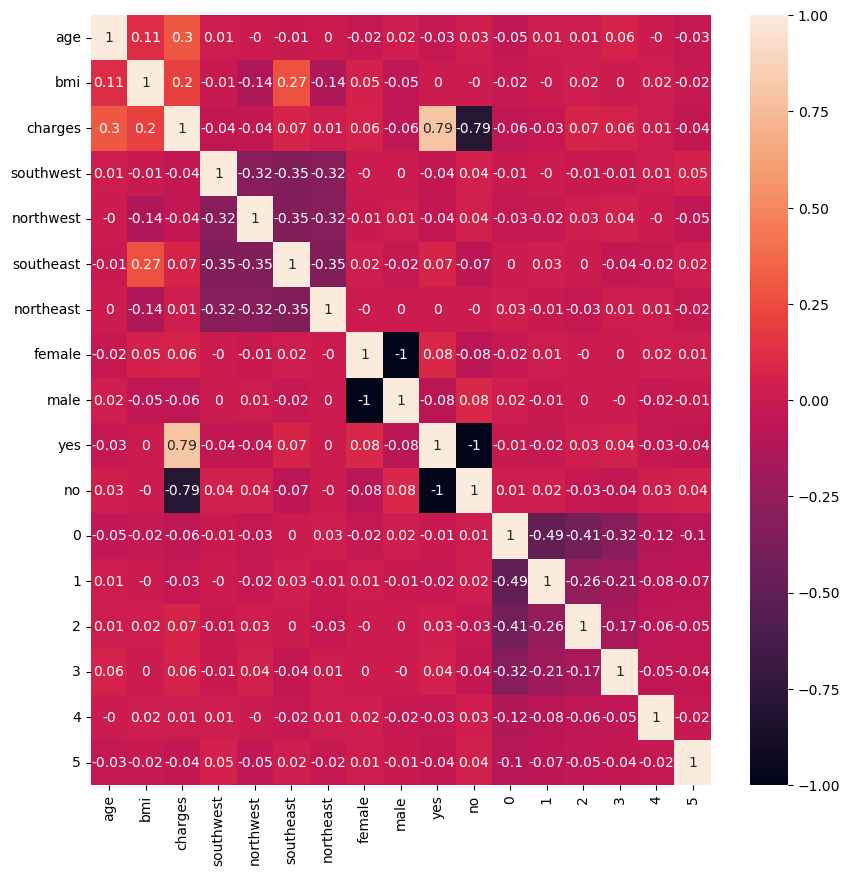

In [302]:
plt.figure(figsize = [10,10])
sns.heatmap(round(df.corr(),2), annot = True)

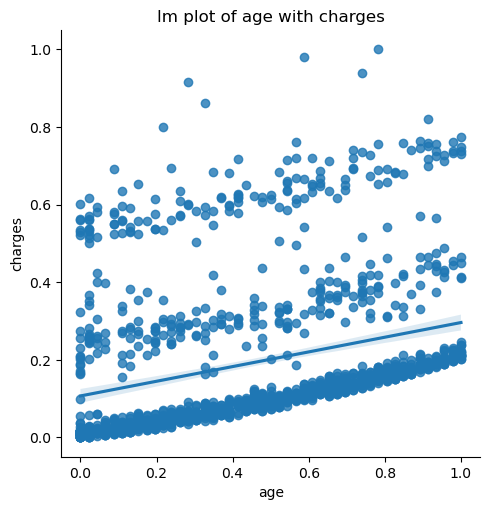

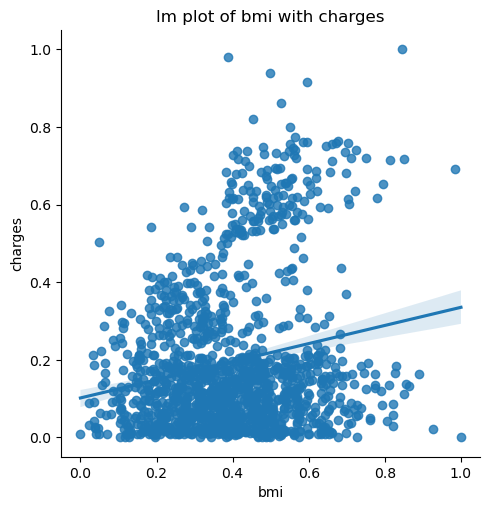

In [303]:
columns = ['age','bmi']

for i,var in enumerate(columns):
    sns.lmplot(data = df,
               x = var,
               y = 'charges')
    plt.title(f'lm plot of {var} with charges')

# 모델링 피팅 

In [304]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as ols
import statsmodels.api as sm

In [305]:
df= sm.add_constant(df) #OLS 정규 방정식을 이용해서 하기 때문에 데이터 프레임에 절편값을 의미 하는 constant 값을 추가해줘야 한다. 

x_train,x_test,y_train,y_test = train_test_split(df.drop('charges',axis=1), df['charges'],
                                                 test_size = 0.2 ,
                                                 random_state = 42) 

In [319]:
model=sm.OLS(y_train,x_train).fit() #ols 선형회귀분석 모델에 train set 의 target 값과 독립변수들을 피팅 시켜주면 
model.summary() #요약값이 나온다 


#coef = 각각의 기울기 값을 의미한다.

# 해당 선형 회귀모형의 방정식은 Y = 0.0621 + 0.1894 * age + 0.1988 * bmi + southwest * 0.01 .... 이런 식으로 말이다 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     254.9
Date:                Sat, 28 Jan 2023   Prob (F-statistic):          7.33e-302
Time:                        01:07:50   Log-Likelihood:                 976.15
No. Observations:                1070   AIC:                            -1926.
Df Residuals:                    1057   BIC:                            -1862.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0621      0.004     14.458      0.000       0.054       0.071
age            0.1894      0.010     19.103      0.000       0.170       0.209
bmi            0.1988      0.019     10.314      0.000       0.161       0.237
southwest      0.0100      0.005      1.875      0.061      -0.000       0.020
northwest      0.0165      0.005      3.065      0.002       0.006       0.027
southeast      0.0125      0.006      2.256      0.024       0.002       0.023
northeast      0.0232      0.005      4.420      0.000       0.013       0.033
female         0.0308      0.004      8.451      0.000       0.024       0.038
male           0.0313      0.004      8.375      0.000       0.024       0.039
yes            0.2199      0.005     47.010      0.000       0.211       0.229
no            -0.1577      0.004    -40.375      0.000      -0.165      -0.150
0             -0.0076      0.007     -1.135      0.257      -0.021       0.006
1             -0.0024      0.007     -0.318      0.750      -0.017       0.012
2              0.0174      0.008      2.148      0.032       0.002       0.033
3              0.0023      0.009      0.247      0.805      -0.016       0.020
4              0.0450      0.018      2.470      0.014       0.009       0.081
5              0.0074      0.022      0.341      0.733      -0.035       0.050
==============================================================================
Omnibus:                      246.402   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.985
Skew:                           1.228   Prob(JB):                    1.72e-129
Kurtosis:                       5.695   Cond. No.                     3.57e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.61e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### R^2 설명력이 0.743
##### durbin-Watson = 2.076 으로 자기 상관성이 없는 모습을 볼 수 있다.
##### coeficience 값들은 대부분 유의미한 변수로서 작용했지만 아이의 수에 따라서는 그렇게 큰 유의미한 수치가 아녔다.
##### Notes 값을 보면 The smallest eigenvalue is 2.61e-30. This might indicate that there are strong multicollinearity problems or that the design matrix is singular. 독립 변수 간 다중공선성이 있는 거 같다 나중에 최적화 해보자 

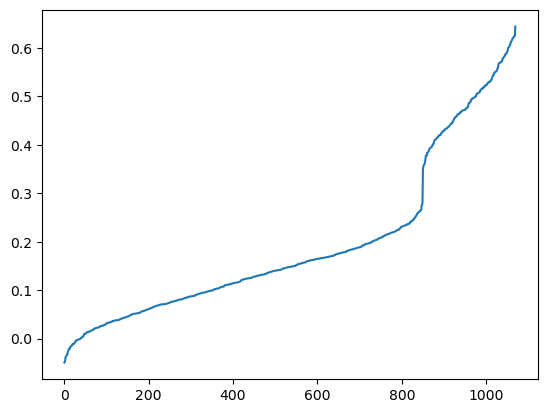

In [333]:
import numpy as np
plt.plot(np.sort(model.predict(x_train))) # 내가 예측한 값의 그래프 모형은 이렇게 생겼다.
                                          # model_predict(x_train) 을 하면 해당 모델로 x_train 값을 이용해 예측한 값이 나온다.

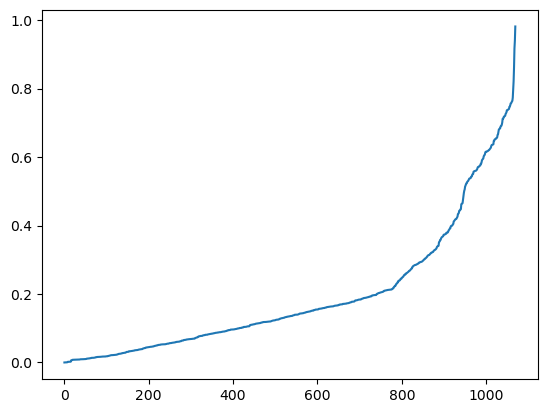

In [332]:
plt.plot(np.sort(y_train)) #실제 값의 모형은 이렇게 생겼고 .. 유사한가? 글쎄 웃기게 생겼다 그냥 

<AxesSubplot:>

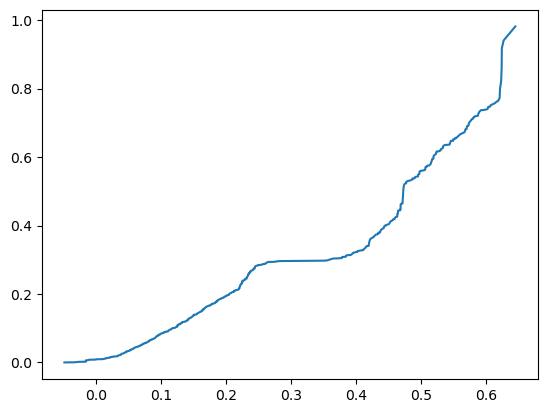

In [334]:
sns.lineplot(np.sort(model.predict(x_train)),np.sort(y_train)) 
# x축을 예측값, y축을 실제값으로 두고 라인 플랏을 그려보면 선형 회귀모형이 잘 만들어졌다면 , 아주 올곧은 일직선을 보여야 한다
# 무슨 냄비로 맞은 것 마냥 중간 부분이 울퉁불퉁하다
# 웃기다 그냥 

# 잔차의 정규성 확인 

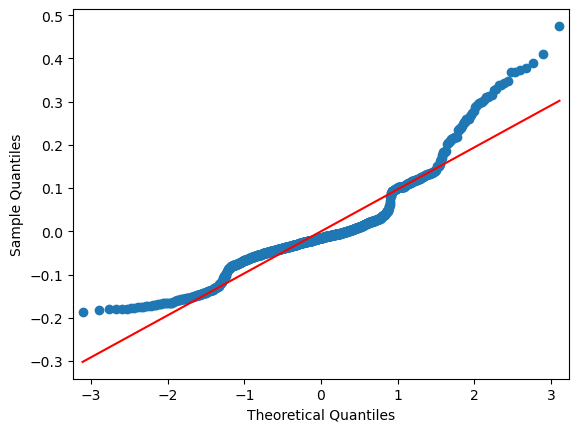

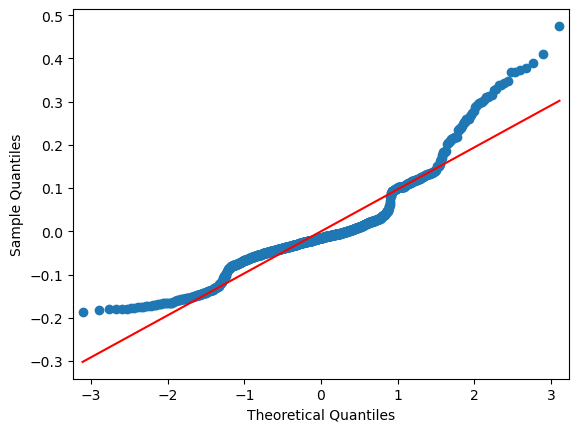

In [308]:
sm.ProbPlot(model.resid).qqplot(line='s')

### 엥 이따구로 나오면 안된다. 원래는 잔차는 평균이 0인 정규 분포를 따르기 때문에 QQ plot 을 그려보면 저 빨간선을 따라 일자로 쭉 올곧게 나와야 한다 
### 잔차가 정규성을 따르지 않으면 해당 선형회귀모형의 R^2 값은 유의미하다고 보기 힘들다 


# 잔차의 등분산성 확인 

C:\Users\whileduck\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residual')

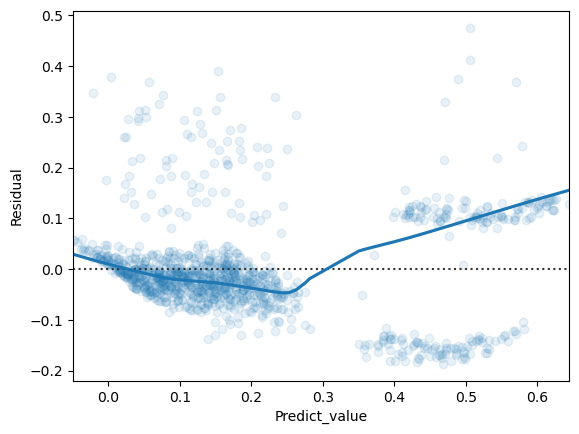

In [309]:
sns.residplot(model.predict(x_train),model.resid,lowess=True,scatter_kws={'alpha':0.1})
plt.xlabel('Predict_value')
plt.ylabel('Residual')

### ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ엥 이것도 이따구로 나오면 안된다 
### 잔차는 평균이 0인 값을 따라 같은 분산 양상을 보이며 나와야 한다. 
### 아마도 변수의 수가 너무 많아 다중공성선을 보여 이렇게 나온듯 싶다 
### 해당 모형은 망했고 자고 일어나서 다시 변수의 수를 줄이고 다시 해보자 